In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# **Ouverture du csv, un peu long car volumineux**

In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/Val_projet/airbnb.csv',";")

Le dataframe est immense et nous n'allons pas tout utiliser, nous supprimons toutes les colonnes qui ne sont pas utiles à notre recherche. Nous pourrons toujours venir les rechercher si nous en avons le besoin


In [ ]:
#Premiere supression de variables pas utiles à notre analyse
df=df.drop(['Listing Url','Scrape ID','Last Scraped','Host Acceptance Rate','Scrape ID','Last Scraped',
            'Thumbnail Url','Medium Url','Picture Url','XL Picture Url','Host URL','Host Acceptance Rate',
           'Host Thumbnail Url','Host Picture Url','Host Verifications','Neighbourhood','Neighbourhood Group Cleansed',
           'Geolocation','Has Availability','Calendar last Scraped','License','Jurisdiction Names'], axis=1)

In [ ]:
#deuxieme supression de variables pas utiles à notre analyse
df=df.drop(['Summary','Space','Experiences Offered','Notes','Access','State','Zipcode','Host Name','Host Location','Host Neighbourhood', 'Host ID',
           'Host Listings Count','Smart Location','Country Code','Square Feet','Security Deposit','Calendar Updated',
            'Guests Included','Extra People','Street','Country','Cancellation Policy','Calculated host listings count','Features','Market'], axis=1)

In [ ]:
#On rename les colonnes qui ont des espaces
df.rename(columns={'ID':"id",'Name': 'name', 'Description': 'description', 'Host About': 'host_about', 'Host Response Time': 'host_response_time', 'Host Response Rate': 'host_response_rate', 'Host Total Listings Count': 'host_total_listing_count', 'Neighbourhood Cleansed': 'neighbourhood_cleansed' , 'City': 'city', 'Property Type': 'property_type', 'Room Type': 'room_type', 'Accommodates': 'accommodates'
, 'Bathrooms': 'bathrooms', 'Bedrooms': 'bedrooms', 'Beds': 'beds', 'Bed Type': 'bed_type', 'Amenities': 'amenities', 'Price': 'price', 'Weekly Price': 'weekly_price', 'Monthly Price': 'monthly_price', 'Cleaning Fee': 'cleaning_fee', 'Minimum Nights': 'minimum_nights', 'Maximum Nights': 'maximum_nights', 'Availability 30': 'availability_30', 'Availability 60': 'availability_60', 'Availability 90': 'availability_90', 'Availability 365': 'availability_365', 'Number of Reviews': 'number_of_reviews', 'First Review': 'first_review'
, 'Last Review': 'last_review', 'Review Scores Rating': 'review_scores_rating', 'Review Scores Accuracy': 'review_scores_accuracy', 'Review Scores Cleanliness': 'review_scores_cleanliness', 'Review Scores Checkin': 'review_scores_checkin', 'Review Scores Communication': 'review_scores_communication', 'Review Scores Location': 'review_scores_location', 'Review Scores Value': 'review_scores_value', 'Reviews per Month': 'reviews_per_month', 'Longitude': 'longitude','Latitude': 'latitude',"Neighborhood Overview":"neighborhood_overview","Transit":"transit","Interaction":"interaction","House Rules":"house_rules","Host Since":"host_since"}, inplace=True)

In [ ]:
# on met la colonne id en index

df=df.set_index("id")

In [ ]:
#Nous allons nous concentrer sur les villes de Paris et Londres, en les différenciant,
# afin de bien voir quels sont les mots les plus utilisés pour chaque ville, qui sont vraisemblablement dépendants du contexte 

df_paris=df[df.city=='Paris']
df_london=df[df.city=='London']


In [ ]:
#Nous allons garder uniquement les types de propriété 'Apartment' et 'House' qui représente 99,6% du dataset
df_paris['property_type']=df_paris['property_type'].loc[df_paris['property_type'].isin(['Apartment','House'])]
df_london['property_type']=df_london['property_type'].loc[df_london['property_type'].isin(['Apartment','House'])]


In [ ]:
#Nous allons garder uniquement les types de chambre 'Entire home/apt' et 'Private room' qui représente 99,9% du dataset
df_paris['room_type']=df_paris['room_type'].loc[df_paris['room_type'].isin(['Entire home/apt','Private room'])]
df_london['room_type']=df_london['room_type'].loc[df_london['room_type'].isin(['Entire home/apt','Private room'])]


In [ ]:

#On supprimme la première ligne de df_london car elle pose problème pour la visualisation par la suite et elle contient beaucoup de valeurs "Non-renseignées"
df_london.drop( df_london.index[0], inplace=True)


In [ ]:
#On supprime les lignes dont les reviews ne sont pas renseignés étant donnée que c'est un point important de notre analyse
df_paris=df_paris.dropna(axis=0,subset=["first_review","last_review","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"])
df_london=df_london.dropna(axis=0,subset=["first_review","last_review","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"])

In [ ]:
#Maintenant que toutes les données ont une note attribuée, nous allons affiner en retirant les lignes qui ont des nans et qui peuvent fausser notre analyse.
df_paris=df_paris.dropna(axis=0,subset=["description","name","host_since","host_total_listing_count","price"])
df_london=df_london.dropna(axis=0,subset=["description","name","host_since","host_total_listing_count","price"]) 

In [ ]:
#on cherche les mots qui reviennent le plus dans les annonces qui ont les meilleures notes et dans celles qui ont les moins bonnes notes
# pour voir si les descriptions peuvent avoir une incidence sur les notes


In [123]:
df_paris["review_scores_rating"].unique()
# on ne garde que les annonces qui ont un score supérieur ou égale à 90
df_paris[df_paris.review_scores_rating >= 90]
df_paris_meilleur=df_paris[df_paris.review_scores_rating >= 90]

In [ ]:
# Importations

## for data
import collections
import json
## for plotting
import wordcloud
## for text processing
import re
import nltk
## for language detection
!pip install langdetect
import langdetect 
## for sentiment
from textblob import TextBlob
## for ner
import spacy
## for vectorizer
from sklearn import feature_extraction, manifold
## for word embedding
import gensim.downloader as gensim_api
## for topic modeling
import gensim

     |████████████████████████████████| 981 kB 9.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=0725768b9d348544941ae0de8e11c2b74c97b9f511d04805d19741980e0d9eda
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [124]:
description_string = "\n\n".join(df_paris_meilleur.description)

# On analyse les mots utilisés dans les descriptions des annonces les mieux notées à Paris

In [125]:
#Commençons par nettoyer les données textuelles de la variable description

description_string = re.sub('\s+',' ',description_string).strip().lower()
description_string[:600]

'bienvenue chez moi, j\'habite en plein centre de paris face à l\'hôtel de ville. le studio a été entièrement refait à neuf en début d\'année. il y a du parquet au sol. la salle de bain est très agréable. il est parfait pour un couple. idéalement situé a 2 pas du métro, de beaubourg, notre dame de paris et tous les commerces. très fonctionnel et propre. la décoration est une de mes passions ! guides et cartes de paris à disposition ! free wifi je serais entièrement disponible pour répondre aux questions des voyageurs :) mon quartier "le marais" est unique à paris. a taille humaine, tout est access'

In [ ]:
r=re.compile(r"[0-9]")
description_string=r.sub(" ",description_string)
description_string[:600]

'bienvenue chez moi, j\'habite en plein centre de paris face à l\'hôtel de ville. le studio a été entièrement refait à neuf en début d\'année. il y a du parquet au sol. la salle de bain est très agréable. il est parfait pour un couple. idéalement situé a   pas du métro, de beaubourg, notre dame de paris et tous les commerces. très fonctionnel et propre. la décoration est une de mes passions ! guides et cartes de paris à disposition ! free wifi je serais entièrement disponible pour répondre aux questions des voyageurs :) mon quartier "le marais" est unique à paris. a taille humaine, tout est access'

In [ ]:
r=re.compile(r"[\-\.\:\)\(\,\+\*\#\!\?\@\°\<\>\&\;\'\"\[\]]")
description_string=r.sub(" ",description_string)
description_string[:600]

'bienvenue chez moi  j habite en plein centre de paris face à l hôtel de ville  le studio a été entièrement refait à neuf en début d année  il y a du parquet au sol  la salle de bain est très agréable  il est parfait pour un couple  idéalement situé a   pas du métro  de beaubourg  notre dame de paris et tous les commerces  très fonctionnel et propre  la décoration est une de mes passions   guides et cartes de paris à disposition   free wifi je serais entièrement disponible pour répondre aux questions des voyageurs    mon quartier  le marais  est unique à paris  a taille humaine  tout est access'

In [ ]:
r=re.compile(r"[\s]{2,}")
description_string=r.sub(" ",description_string)
description_string[:600]

'bienvenue chez moi j habite en plein centre de paris face à l hôtel de ville le studio a été entièrement refait à neuf en début d année il y a du parquet au sol la salle de bain est très agréable il est parfait pour un couple idéalement situé a pas du métro de beaubourg notre dame de paris et tous les commerces très fonctionnel et propre la décoration est une de mes passions guides et cartes de paris à disposition free wifi je serais entièrement disponible pour répondre aux questions des voyageurs mon quartier le marais est unique à paris a taille humaine tout est accessible à pieds un must da'

In [ ]:
r=re.compile(r"\bdb\b")
description_string=r.sub("double",description_string)
description_string[:600]

'bienvenue chez moi j habite en plein centre de paris face à l hôtel de ville le studio a été entièrement refait à neuf en début d année il y a du parquet au sol la salle de bain est très agréable il est parfait pour un couple idéalement situé a pas du métro de beaubourg notre dame de paris et tous les commerces très fonctionnel et propre la décoration est une de mes passions guides et cartes de paris à disposition free wifi je serais entièrement disponible pour répondre aux questions des voyageurs mon quartier le marais est unique à paris a taille humaine tout est accessible à pieds un must da'

In [ ]:
r=re.compile(r"\binc\b")
description_string=r.sub("included",description_string)
description_string[:600]

'bienvenue chez moi j habite en plein centre de paris face à l hôtel de ville le studio a été entièrement refait à neuf en début d année il y a du parquet au sol la salle de bain est très agréable il est parfait pour un couple idéalement situé a pas du métro de beaubourg notre dame de paris et tous les commerces très fonctionnel et propre la décoration est une de mes passions guides et cartes de paris à disposition free wifi je serais entièrement disponible pour répondre aux questions des voyageurs mon quartier le marais est unique à paris a taille humaine tout est accessible à pieds un must da'

In [ ]:
r=re.compile(r"\bwi\sfi\b")
description_string=r.sub("wifi",description_string)
description_string[:900]

'bienvenue chez moi j habite en plein centre de paris face à l hôtel de ville le studio a été entièrement refait à neuf en début d année il y a du parquet au sol la salle de bain est très agréable il est parfait pour un couple idéalement situé a pas du métro de beaubourg notre dame de paris et tous les commerces très fonctionnel et propre la décoration est une de mes passions guides et cartes de paris à disposition free wifi je serais entièrement disponible pour répondre aux questions des voyageurs mon quartier le marais est unique à paris a taille humaine tout est accessible à pieds un must dans la capitale mon appartement est à seulement quelques mètres d une station de métro si possible il est préférable que les voyageurs prennent leurs propres serviettes de bain merci beautiful and lightful m apartment close to the place des vosges in the heart of le marais a large living / dining roo'

In [ ]:
r=re.compile(r"\bnr\b")
description_string=r.sub("near",description_string)
#name_string[:900]

In [ ]:
import re
def remove_emojis(description_string):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '',description_string)

In [ ]:
# tokenisation
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import PunktSentenceTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokenizer=PunktSentenceTokenizer()
tokenizer.tokenize(description_string)
description_tokenized=word_tokenize(description_string,language="english")
#description_tokenized[:90]

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words.update(["br","two","k","bd","and","br","la","m","le","dans","de","g","les","des","du","one","st","et","à","un","est","l","avec","une","pour","en","au"])
# j'ajoute manuellement les stop words en français les plus communs 
# nous avons choisi de garder les 2 langues car beaucoup de propriétaires français écrivent en anglais pour les touristes internationaux
# Comme nous comprenons les deux langues cela n'est pas vraiment gênant pour notre analyse, à l'interne

In [ ]:
def stop_words_filtering(description_tokenized) : 
    tokens = []
    for mot in description_tokenized:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

In [ ]:
filtered_description = [w for w in description_tokenized if not w.lower() in stop_words]
 
filtered_description = []
 
for w in name_tokenized:
    if w not in stop_words:
        filtered_description.append(w)
 
#print(description_tokenized)
#filtered_description[:90]

In [ ]:
# Vectorisation:

# Connaître l'occurence des mots utilisés pour décrire les logements:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
vectorizer.fit_transform(filtered_description)
tokenized=vectorizer.vocabulary_
#tokenized


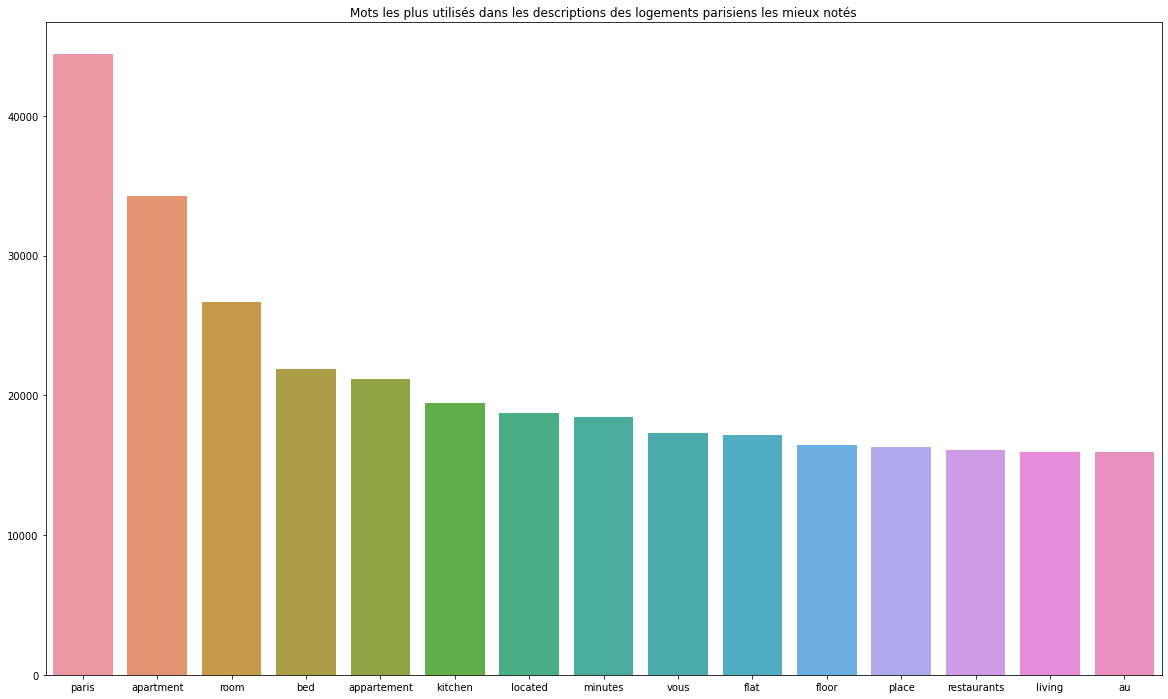

In [ ]:
from collections import Counter
import seaborn as sns
dico=Counter(filtered_description)
mots=[m[0] for m in dico.most_common(15)]
freq=[m[1] for m in dico.most_common(15)]
plt.figure(figsize=(20,12))
sns.barplot(x=mots,y=freq)
plt.title("Mots les plus utilisés dans les descriptions des logements parisiens les mieux notés");


In [126]:
#Faisons la même chose avec les logements les mieux notés de Londres

df_london[df_london.review_scores_rating >= 90]
df_london_meilleur=df_london[df_london.review_scores_rating >= 90]

In [127]:
description_string_london = "\n\n".join(df_london_meilleur.description)

In [128]:
#nettoyage des données textuelles
description_string_london = re.sub('\s+',' ',description_string_london).strip().lower()
description_string_london[:600]

'my home is a large four bedroom space set over three floors. there is a huge common area with an open plan living room / dining room / kitchen, and the top floor has charming slanted roofs and skylight windows. this space is perfect for a large group of friends or a family who wants all the comforts of home while still being accessible to london. this is a bright, tidy, and spacious home in a quiet neighbourhood that is accessible to central london through several tube lines and bus routes. set over three floors, there is plenty of space to stretch out and make yourself at home here. bedrooms '

In [ ]:
r=re.compile(r"[0-9]")
description_string_london=r.sub(" ",description_string_london)

r=re.compile(r"[\-\.\:\)\(\,\+\*\#\!\?\@\°\<\>\&\;\'\"\[\]]")
description_string_london=r.sub(" ",description_string_london)

r=re.compile(r"[\s]{2,}")
description_string_london=r.sub(" ",description_string_london)

r=re.compile(r"\bdb\b")
description_string_london=r.sub("double",description_string_london)

r=re.compile(r"\bwi\sfi\b")
description_string_london=r.sub("wifi",description_string_london)

r=re.compile(r"\bnr\b")
description_string_london=r.sub("near",description_string_london)

description_string_london[:600]

'my home is a large four bedroom space set over three floors there is a huge common area with an open plan living room / dining room / kitchen and the top floor has charming slanted roofs and skylight windows this space is perfect for a large group of friends or a family who wants all the comforts of home while still being accessible to london this is a bright tidy and spacious home in a quiet neighbourhood that is accessible to central london through several tube lines and bus routes set over three floors there is plenty of space to stretch out and make yourself at home here bedrooms there are'

In [ ]:
import re
def remove_emojis(description_string_london):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '',description_string_london)

In [ ]:
tokenizer=PunktSentenceTokenizer()
tokenizer.tokenize(description_string_london)
description_london_tokenized=word_tokenize(description_string_london,language="english")


In [ ]:
stop_words=set(stopwords.words("english"))
stop_words.update(["br","two","k","bd","and","br","m","one","st","l","s","also"])

def stop_words_filtering(description_london_tokenized) : 
    tokens = []
    for mot in description_london_tokenized:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

filtered_description_london = [w for w in description_london_tokenized if not w.lower() in stop_words]
filtered_description_london = []
 
for w in description_london_tokenized:
    if w not in stop_words:
        filtered_description_london.append(w)

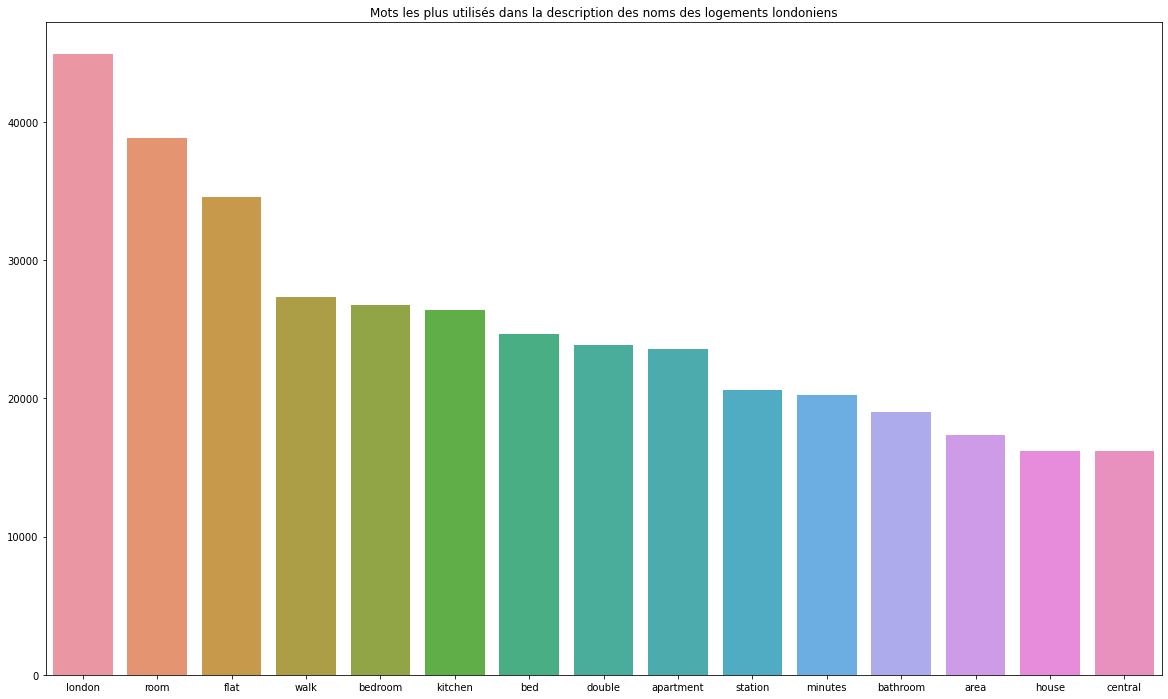

In [ ]:
vectorizer=CountVectorizer()
vectorizer.fit_transform(filtered_description_london)
tokenized=vectorizer.vocabulary_

dico=Counter(filtered_description_london)
mots=[m[0] for m in dico.most_common(15)]
freq=[m[1] for m in dico.most_common(15)]
plt.figure(figsize=(20,12))
sns.barplot(x=mots,y=freq)
plt.title("Mots les plus utilisés dans la description des noms des logements londoniens");

In [ ]:
# Regardons maintenant les descriptions des logements les moins bien notés dans ces deux villes
df_paris["review_scores_rating"].unique()
# on ne garde que les annonces qui ont un score inférieur ou égale à 70
df_paris[df_paris.review_scores_rating <= 70]
df_paris_mauvais=df_paris[df_paris.review_scores_rating <= 70]



In [ ]:

description_mauvais_string = "\n\n".join(df_paris_mauvais.description)

In [ ]:

description_mauvais_string = re.sub('\s+',' ',description_mauvais_string).strip().lower()
r=re.compile(r"[0-9]")
description_mauvais_string=r.sub(" ",description_mauvais_string)
r=re.compile(r"[\-\.\:\)\(\,\+\*\#\!\?\@\°\<\>\&\;\'\"\[\]]")
description_mauvais_string=r.sub(" ",description_mauvais_string)
r=re.compile(r"[\s]{2,}")
description_mauvais_string=r.sub(" ",description_mauvais_string)
r=re.compile(r"\bdb\b")
description_mauvais_string=r.sub("double",description_mauvais_string)
r=re.compile(r"\binc\b")
description_mauvais_string=r.sub("included",description_mauvais_string)
r=re.compile(r"\bwi\sfi\b")
description_mauvais_string=r.sub("wifi",description_mauvais_string)
r=re.compile(r"\bnr\b")
description_mauvais_string=r.sub("near",description_mauvais_string)

In [ ]:
import re
def remove_emojis(description_mauvais_string):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '',description_mauvais_string)

In [ ]:
tokenizer=PunktSentenceTokenizer()
tokenizer.tokenize(description_mauvais_string)
description_mauvais_tokenized=word_tokenize(description_mauvais_string,language="english")

In [ ]:
stop_words=set(stopwords.words("english"))
stop_words.update(["br","two","k","bd","and","br","la","m","le","dans","de","g","les","des","du","one","st","et","à","un","est","l","avec","une","pour","en","au"])
# on ajoute des stop words français 

In [ ]:
def stop_words_filtering(description_mauvais_tokenized) : 
    tokens = []
    for mot in description_mauvais_tokenized:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

In [ ]:
filtered_mauvais_description = [w for w in description_mauvais_tokenized if not w.lower() in stop_words]
 
filtered_mauvais_description = []
 
for w in description_mauvais_tokenized:
    if w not in stop_words:
        filtered_mauvais_description.append(w)

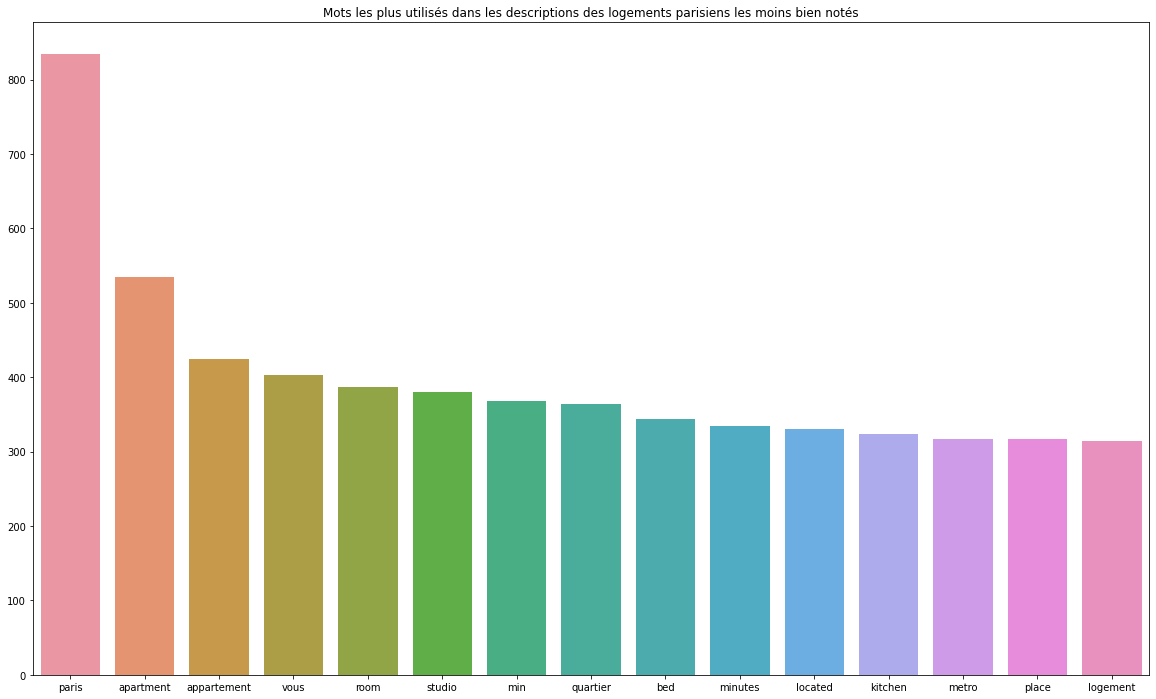

In [ ]:
dico=Counter(filtered_mauvais_description)
mots=[m[0] for m in dico.most_common(15)]
freq=[m[1] for m in dico.most_common(15)]
plt.figure(figsize=(20,12))
sns.barplot(x=mots,y=freq)
plt.title("Mots les plus utilisés dans les descriptions des logements parisiens les moins bien notés");


In [ ]:
# on remarque que les mots sont quasiment les mêmes que pour les annonces les mieux notées.
# La seule différence est que ici, le mot "studio" apparaît, ce qui laisse penser que les logements les moins bien notés sont les très petits logements

In [ ]:
df_london[df_london.review_scores_rating <= 70]
df_london_mauvais=df_london[df_london.review_scores_rating <= 70]

In [ ]:
description_string_mauvais_london = "\n\n".join(df_london_mauvais.description)
description_string_mauvais_london = re.sub('\s+',' ',description_string_mauvais_london).strip().lower()
r=re.compile(r"[0-9]")
description_string_mauvais_london=r.sub(" ",description_string_mauvais_london)
r=re.compile(r"[\-\.\:\)\(\,\+\*\#\!\?\@\°\<\>\&\;\'\"\[\]]")
description_string_mauvais_london=r.sub(" ",description_string_mauvais_london)
r=re.compile(r"[\s]{2,}")
description_string_mauvais_london=r.sub(" ",description_string_mauvais_london)
r=re.compile(r"\bdb\b")
description_string_mauvais_london=r.sub("double",description_string_mauvais_london)
r=re.compile(r"\binc\b")
description_string_mauvais_london=r.sub("included",description_string_mauvais_london)
r=re.compile(r"\bwi\sfi\b")
description_string_mauvais_london=r.sub("wifi",description_string_mauvais_london)
r=re.compile(r"\bnr\b")
description_string_mauvais_london=r.sub("near",description_string_mauvais_london)

In [ ]:
import re
def remove_emojis(description_string_mauvais_london):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '',description_string_mauvais_london)

In [ ]:
tokenizer=PunktSentenceTokenizer()
tokenizer.tokenize(description_string_mauvais_london)
description_tokenized_mauvais_london=word_tokenize(description_string_mauvais_london,language="english")

In [ ]:
stop_words=set(stopwords.words("english"))
stop_words.update(["br","two","k","bd","and","br","one","st"])

def stop_words_filtering(description_tokenized_mauvais_london) : 
    tokens = []
    for mot in description_tokenized_mauvais_london:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

In [ ]:
filtered_description_london = [w for w in description_tokenized_mauvais_london if not w.lower() in stop_words]
 
filtered_description_mauvais_london = []
 
for w in description_tokenized_mauvais_london:
    if w not in stop_words:
        filtered_description_mauvais_london.append(w)

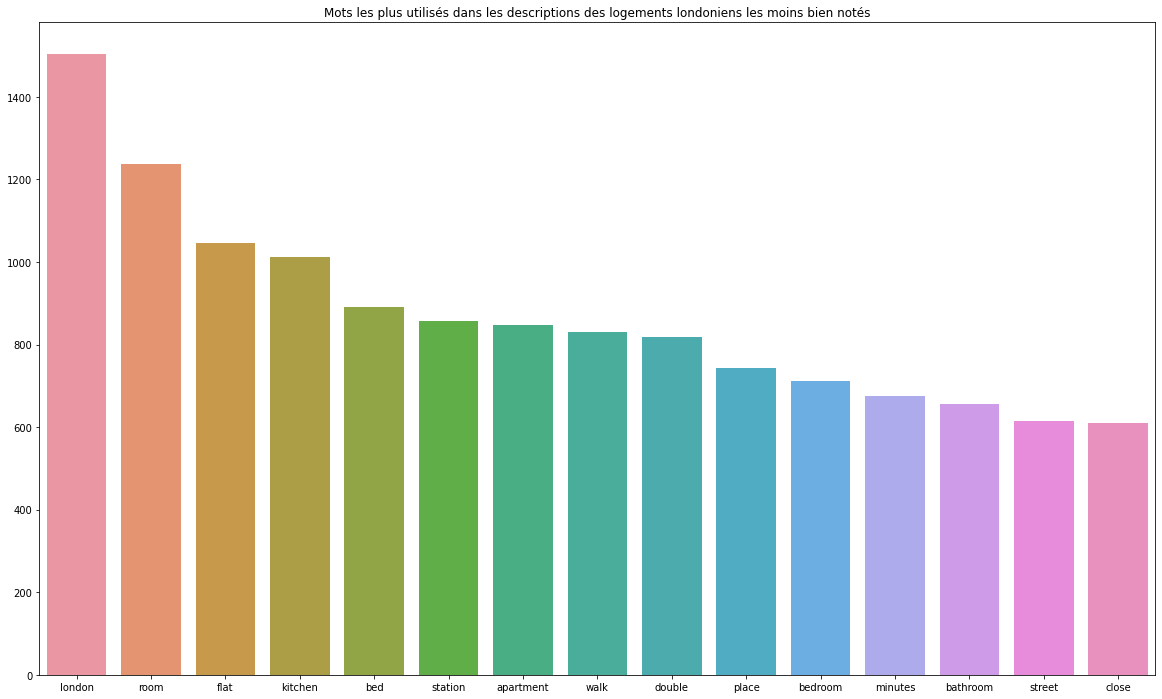

In [ ]:
dico=Counter(filtered_description_mauvais_london)
mots=[m[0] for m in dico.most_common(15)]
freq=[m[1] for m in dico.most_common(15)]
plt.figure(figsize=(20,12))
sns.barplot(x=mots,y=freq)
plt.title("Mots les plus utilisés dans les descriptions des logements londoniens les moins bien notés");

In [ ]:
# les mots les plus utilsés dans les descriptions des logements londoniens les moins bien notés sont quasiment les mêmes que dans les descriptions des logements les mieux notés.
# la seule différence est que le mot "central" n'apparaît plus dans les annonces les moins bien notées.
# on en conclue donc que les meilleures notes sont vraisemblablement attribuées aux logements situés dans le centre de Londres. 

In [ ]:
b